#### Objective of this kernel:
* To impliment KNN machine Learning algorithm 
* To save our model for future use
* To measure the accuracy of our model

### Importing our libraries 

In [168]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the "../output/" directory.
import os
for dirname, _, filenames in os.walk('./output/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.

./output/linearmodel.pickle
./output/naive_bayes.pickle
./output/KNNmodel.pickle
./output/processed_data.csv
./output/cleaned_data.csv
./output/Logregmodel.pickle
./output/SVMmodel.pickle
./output/.ipynb_checkpoints/cleaned_data-checkpoint.csv


## Reading the data set

In [169]:
df = pd.read_csv('./output/cleaned_data.csv')
df.shape #  describes the shape of our data

(238, 8)

## we are going to transform all our categorical data to proper format to be fed to our machine learning algorithms
* We preprocess our data with the LabelEncoder from sklearn

#### Preprocessing our independent variable x and dependent variable y

In [170]:
from sklearn.preprocessing import LabelEncoder
label_encoder_x=LabelEncoder()
#preprocessing x
Age=label_encoder_x.fit_transform(list(df["Age"]))
Gender=label_encoder_x.fit_transform(list(df["Gender"]))
wassce_grade=label_encoder_x.fit_transform(list(df["wassce grade"]))
level=label_encoder_x.fit_transform(list(df["level"]))
access_to_a_laptop_or_internet=label_encoder_x.fit_transform(list(df["access to a laptop or internet"]))
study_group=label_encoder_x.fit_transform(list(df["study group"]))
time_spent_on_independent_studies=label_encoder_x.fit_transform(list(df["time spent on independent studies"]))

current_CGPA=label_encoder_x.fit_transform(list(df["current CGPA"]))


x=list(zip(Age,Gender,wassce_grade,access_to_a_laptop_or_internet,study_group,time_spent_on_independent_studies,))
y=list(current_CGPA)

## Lets start implimenting our KNN machine learning algorithm on our dataset

### Fitting the training data

In [9]:
from sklearn.model_selection import train_test_split 
import pickle # This is used to save our model to be used in the future 
# we split our data into training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
from sklearn.preprocessing import StandardScaler # to scale our data 
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Initializing the KNN Regressor 

In [165]:
# importing KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
best = 0
for _ in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
    regressor = KNeighborsRegressor(n_neighbors = 6, metric = 'minkowski', p = 7)
    regressor.fit(x_train, y_train)
    regressor_score = regressor.score(x_test,y_test)
    if regressor_score > best:
        best = regressor_score
        with open("./output/KNNmodel.pickle","wb") as f:
            pickle.dump(regressor,f)
print(regressor_score)

0.2149695387293299


### Predicting the classes for test set

In [172]:
import warnings
warnings.filterwarnings('ignore') 
Y_pred = regressor.predict(x_test)

y_pred = np.round_(Y_pred, decimals=0, out=None)
    
print ("Predicted Value:",y_pred)

Predicted Value: [1. 2. 2. 2. 2. 2. 2. 3. 2. 3. 2. 2. 3. 2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2.]


## Model Evaluation using Confusion Matrix### Calculating the accuracy of the predictions

In [173]:
import warnings
warnings.filterwarnings('ignore') 
# import the metrics class
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print("\nConfusion Matrix of naive_bayes:\n")
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy of naive_bayes: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
print("\nClassification Report of naive_bayes:\n")
print(classification_report(y_test, y_pred))


Confusion Matrix of naive_bayes:

Accuracy of naive_bayes: 41.67%

Classification Report of naive_bayes:

              precision    recall  f1-score   support

           1       1.00      0.20      0.33         5
           2       0.42      0.80      0.55        10
           3       0.25      0.12      0.17         8
           4       0.00      0.00      0.00         1

    accuracy                           0.42        24
   macro avg       0.42      0.28      0.26        24
weighted avg       0.47      0.42      0.35        24



#### Visualizing Confusion Matrix using Heatmap

Text(0.5, 427.9555555555555, 'Predicted label')

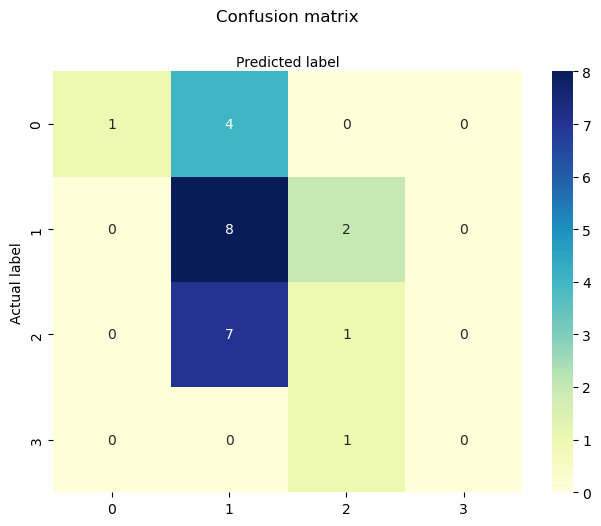

In [175]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [176]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error,confusion_matrix
print("The mean_squared_error of the KNN is: {}".format(mean_squared_error(y_test, y_pred)))
print("mean_squared_log_error of the KNN is: {}".format(mean_squared_log_error(y_test, y_pred)))

The mean_squared_error of the KNN is: 0.5833333333333334
mean_squared_log_error of the KNN is: 0.06051040138988103


In [ ]:
# names = =["First class","Second class upper","Second class lower","Third class"]

#     4.0 - 3.6 : First class
#     3.5 - 3.0 : Second class upper
#     2.9 - 2.5 : Second class lower
#     2.4 - 2.0 : Third class
#     1.9 - 1.5 : Pass
#     Below 1.5 : Fail


#### loading linear KNN model so we dont have to rerun our algorithm 

In [177]:
pickle_in = open("./output/KNNmodel.pickle","rb")
regressor = pickle.load(pickle_in)